UNAD

Fabio Ernesto Ortiz Otalora

Dataset Titanic con Regresion Logistica


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.



In [92]:
#cargar las librerias necesarias

import pandas as pd # manejo y analisis de estructuras de datos
import numpy as np  # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # creacion de graficos en 2 dimensiones
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
# Lectura de datos en Python y lo cargamos en la variable datos

Datos = pd.read_csv('C:\\Users\\fabio\\OneDrive\\ING SISTEMAS\\6.2 ANALISIS DE DATOS\\TAREA 5\\Titanic-Dataset.csv')

In [63]:
# Realizamos Lectura de los Datos para el analisis exploratorio

Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
# Descripcion de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

Text(0.5, 1.0, 'Identificacion de Datos faltantes y atipicos - Parch')

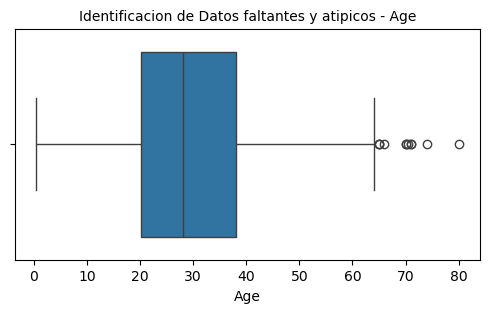

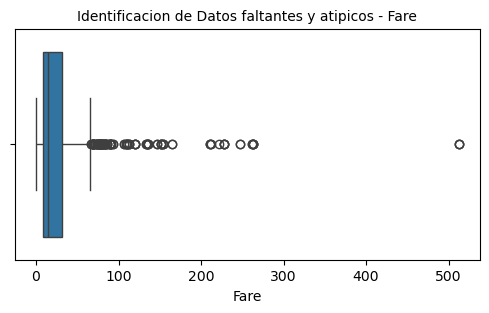

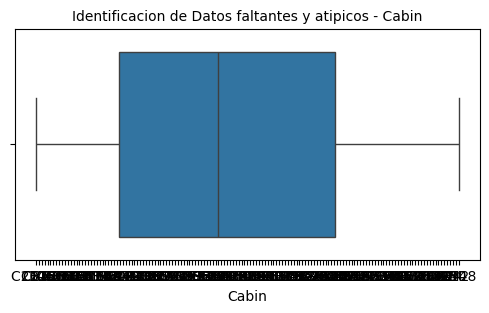

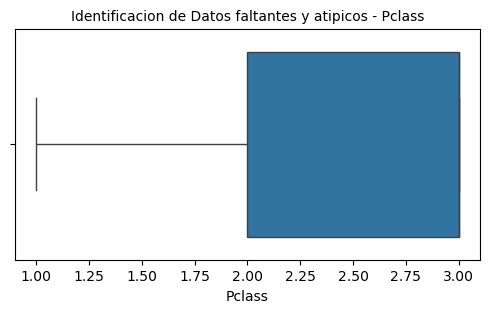

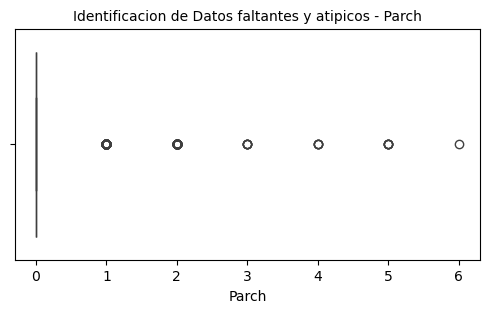

In [68]:
#Identificacion de Datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title( 'Identificacion de Datos faltantes y atipicos - Age', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title( 'Identificacion de Datos faltantes y atipicos - Fare', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Cabin'])
plt.title( 'Identificacion de Datos faltantes y atipicos - Cabin', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title( 'Identificacion de Datos faltantes y atipicos - Pclass', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Parch'])
plt.title( 'Identificacion de Datos faltantes y atipicos - Parch', fontsize=10 )

In [69]:
# Revision de Datos faltantes

print("Cantidad de Registros con cero en Edad: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa: ", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina: ", Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ", Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ", Datos['Parch'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Tarifa:  15
Cantidad de Registros con cero en Cabina:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Parch:  678


In [70]:
# Reemplazar todos los ceros con el valor promedio de la columna

Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())
Datos['Fare']=Datos['Fare'].replace(0,Datos['Fare'].mean())

In [74]:
# Revision nuevamente de datos faltantes

print("Cantidad de Registros con cero en Edad: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Tarifa: ", Datos['Fare'].isin([0]).sum())
print("Cantidad de Registros con cero en Cabina: ", Datos['Cabin'].isin([0]).sum())
print("Cantidad de Registros con cero en Pclass: ", Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Parch: ", Datos['Parch'].isin([0]).sum())


Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Tarifa:  0
Cantidad de Registros con cero en Cabina:  0
Cantidad de Registros con cero en Pclass:  0
Cantidad de Registros con cero en Parch:  678


Text(0.5, 1.0, 'Identificacion de Datos atipicos - Parch')

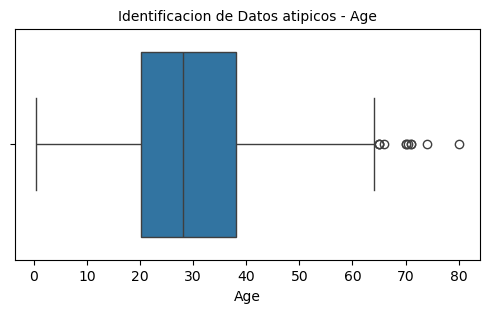

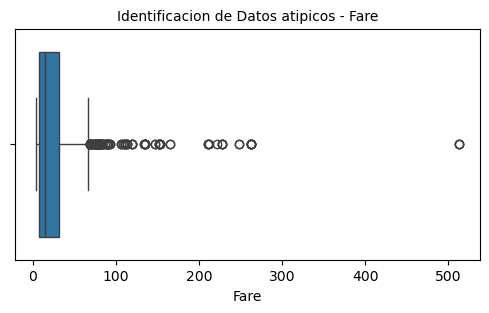

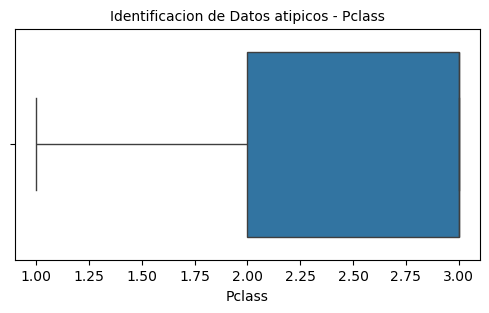

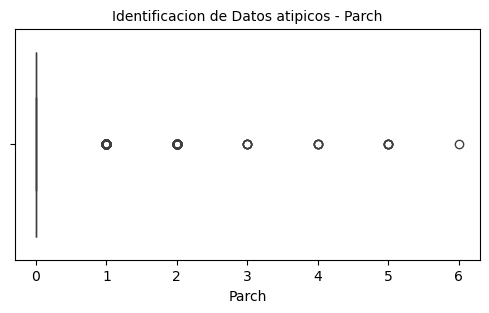

In [76]:
# Identificacion de datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title( 'Identificacion de Datos atipicos - Age', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Fare'])
plt.title( 'Identificacion de Datos atipicos - Fare', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Pclass'])
plt.title( 'Identificacion de Datos atipicos - Pclass', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Parch'])
plt.title( 'Identificacion de Datos atipicos - Parch', fontsize=10 )

In [78]:
#Conteo de Datos Atipicos

nivel_minimots=0
nivel_maximots=70
Total_Atipicosts=((Datos['Age']<nivel_minimots)|(Datos['Age']>nivel_maximots)).sum()
print("El total de datos atipicos de Age es {}".format(Total_Atipicosts))

nivel_minimoch=0
nivel_maximoch=150
Total_Atipicosch=((Datos['Fare']<nivel_minimoch)|(Datos['Fare']>nivel_maximoch)).sum()
print("El total de datos atipicos de Fare es {}".format(Total_Atipicosch))

nivel_minimoth=2
nivel_maximoth=3
Total_Atipicosth=((Datos['Pclass']<nivel_minimoth)|(Datos['Pclass']>nivel_maximoth)).sum()
print("El total de datos atipicos de Pclass es {}".format(Total_Atipicosth))

nivel_minimoop=0
nivel_maximoop=2.5
Total_Atipicosop=((Datos['Parch']<nivel_minimoop)|(Datos['Parch']>nivel_maximoop)).sum()
print("El total de datos atipicos de Parch es {}".format(Total_Atipicosop))


El total de datos atipicos de Age es 5
El total de datos atipicos de Fare es 29
El total de datos atipicos de Pclass es 216
El total de datos atipicos de Parch es 15


In [80]:
#Filtra Datos atipicos

Datos=Datos[(Datos['Age']<nivel_maximots)&(Datos['Age']>nivel_minimots)]
Datos=Datos[(Datos['Fare']<nivel_maximoch)&(Datos['Fare']>nivel_minimoch)]
Datos=Datos[(Datos['Parch']<nivel_maximoop)&(Datos['Parch']>nivel_minimoop)]

In [82]:
#Validar si se removieron los datos atipicos

nivel_minimots=0
nivel_maximots=70
Total_Atipicosts=((Datos['Age']<nivel_minimots)|(Datos['Age']>nivel_maximots)).sum()
print("El total de datos atipicos de Age es {}".format(Total_Atipicosts))

nivel_minimoch=0
nivel_maximoch=150
Total_Atipicosch=((Datos['Fare']<nivel_minimoch)|(Datos['Fare']>nivel_maximoch)).sum()
print("El total de datos atipicos de Fare es {}".format(Total_Atipicosch))

nivel_minimoth=2
nivel_maximoth=3
Total_Atipicosth=((Datos['Pclass']<nivel_minimoth)|(Datos['Pclass']>nivel_maximoth)).sum()
print("El total de datos atipicos de Pclass es {}".format(Total_Atipicosth))

nivel_minimoop=0
nivel_maximoop=2.5
Total_Atipicosop=((Datos['Parch']<nivel_minimoop)|(Datos['Parch']>nivel_maximoop)).sum()
print("El total de datos atipicos de Parch es {}".format(Total_Atipicosop))

El total de datos atipicos de Age es 0
El total de datos atipicos de Fare es 0
El total de datos atipicos de Pclass es 32
El total de datos atipicos de Parch es 0


In [84]:
# Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 7 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  159 non-null    int64  
 1   Survived     159 non-null    int64  
 2   Pclass       159 non-null    int64  
 3   Name         159 non-null    object 
 4   Sex          159 non-null    object 
 5   Age          159 non-null    float64
 6   SibSp        159 non-null    int64  
 7   Parch        159 non-null    int64  
 8   Ticket       159 non-null    object 
 9   Fare         159 non-null    float64
 10  Cabin        42 non-null     object 
 11  Embarked     159 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.1+ KB


In [86]:
# Total de personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
1    88
0    71
Name: count, dtype: int64

In [88]:
Datos[['Survived']].head(40)

,Survived
7,0
8,1
10,1
16,0
24,0
43,1
50,0
54,0
58,1
59,0


In [105]:
columnas_a_eliminar = ["PassengerId", "Name", "Ticket", "Cabin"]
Datos = Datos.drop(columns=set(columnas_a_eliminar).intersection(Datos.columns))

In [107]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
Datos["Sex"] = label_encoder.fit_transform(Datos["Sex"])  # male=1, female=0

# Imputar valores faltantes
imputer_age = SimpleImputer(strategy="median")
Datos["Age"] = imputer_age.fit_transform(Datos[["Age"]])

imputer_embarked = SimpleImputer(strategy="most_frequent")
Datos["Embarked"] = label_encoder.fit_transform(
    imputer_embarked.fit_transform(Datos[["Embarked"]]).ravel()
)

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [111]:
# Porcentaje de Datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Separar variables predictoras y objetivo
X = Datos.drop(columns=["Survived"])
Y = Datos["Survived"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)
print (X_train)
print(X_train.dtypes)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
622       3    1  20.0      1      1  15.7417         0
329       1    0  16.0      0      1  57.9792         0
823       3    0  27.0      0      1  12.4750         2
71        3    0  16.0      5      2  46.9000         2
549       2    1   8.0      1      1  36.7500         2
..      ...  ...   ...    ...    ...      ...       ...
278       3    1   7.0      4      1  29.1250         1
691       3    0   4.0      0      1  13.4167         0
352       3    1  15.0      1      1   7.2292         0
801       2    0  31.0      1      1  26.2500         2
855       3    0  18.0      0      1   9.3500         2

[119 rows x 7 columns]
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


In [113]:
print (Y_train)

622    1
329    1
823    1
71     0
549    1
      ..
278    0
691    1
352    0
801    1
855    1
Name: Survived, Length: 119, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [115]:
# Construir el modelo de Regresión Logística

modelo_regresion = LogisticRegression(solver = "liblinear") # Liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La funcion predice los valores a partir del conjunto de datos de validacion

In [117]:
print (Y_test)

686    0
8      1
799    0
548    0
233    1
102    0
423    0
58     1
261    1
205    0
16     0
813    0
319    1
97     1
237    1
197    0
539    1
184    1
750    1
542    0
803    1
600    1
472    1
824    0
63     0
835    1
469    1
802    1
417    1
746    0
145    0
532    0
530    1
193    1
386    0
535    1
550    1
424    0
182    0
558    1
Name: Survived, dtype: int64


In [119]:
print (Prediccion)

[0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1
 0 0 1]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [122]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.78      0.82      0.80        22

    accuracy                           0.78        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.77      0.78      0.77        40



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

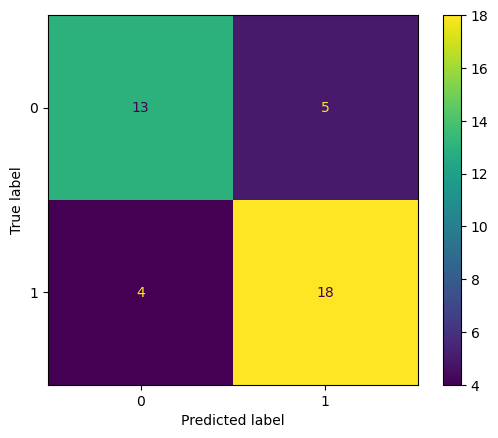

In [125]:
# Matrix de confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

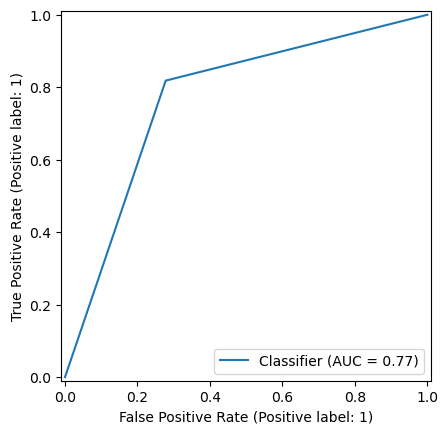

In [127]:
# Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos.


Del desempeño del modelo podemos describir:
Precisión (Precision):
Para la clase 0 (no sobrevivió): La precisión es 0.76, lo que significa que el 76% de las veces en que el modelo predice que un pasajero no sobrevivió, la predicción es correcta.

Para la clase 1 (sobrevivió): La precisión es 0.78, lo que indica que cuando el modelo predice que un pasajero sobrevivió, el 78% de esas predicciones son correctas.

La precisión global es razonablemente alta, y el modelo parece ser equilibrado entre ambas clases.
Recall (Sensibilidad):

Para la clase 0: El recall es 0.72, lo que indica que el modelo identifica correctamente el 72% de los pasajeros que no sobrevivieron.

Para la clase 1: El recall es 0.82, lo que significa que el modelo identifica correctamente el 82% de los pasajeros que sobrevivieron, dejando un 18% de casos de la clase 1 sin identificar (falsos negativos).

Este menor recall en la clase 0 indica que el modelo podría mejorar en la detección de pasajeros que no sobrevivieron.
F1-Score:

Para la clase 0: El F1-score es 0.74, mostrando un equilibrio entre precisión y recall.

Para la clase 1: El F1-score es 0.80, lo que refleja un mejor balance para la clase positiva (sobrevivió).

Estos valores altos indican que el modelo tiene un desempeño sólido en la clasificación de ambas clases.

Exactitud (Accuracy):
La exactitud general del modelo es 0.78 (78%), lo que significa que en promedio el modelo clasifica correctamente el 78% de los casos.
Esto es un buen nivel de exactitud para un problema de clasificación binaria.

Promedios Macro y Ponderados:
Macro Promedio: Promedio simple de las métricas de cada clase (precisión, recall y F1-score) es 0.77, lo que refleja un desempeño balanceado sin considerar la proporción de cada clase.

Promedio Ponderado: Considera la proporción de cada clase y también es aproximadamente 0.77, indicando que el modelo es consistente en ambas clases.

De la matriz de confusión podemos interpretar:

Verdaderos Positivos (Clase 1 predicha correctamente):
Hay 18 casos donde el modelo predijo correctamente que un pasajero sobrevivió.

Verdaderos Negativos (Clase 0 predicha correctamente):
Hay 13 casos donde el modelo predijo correctamente que un pasajero no sobrevivió.

Falsos Positivos (Clase 0 incorrectamente predicha como Clase 1):
Hay 5 casos donde el modelo predijo que un pasajero sobrevivió cuando en realidad no lo hizo.

Falsos Negativos (Clase 1 incorrectamente predicha como Clase 0):
Hay 4 casos donde el modelo predijo que un pasajero no sobrevivió cuando en realidad sí lo hizo.

Interpretación General:
La matriz de confusión muestra que el modelo tiene un buen rendimiento general, pero tiende a clasificar erróneamente algunos pasajeros como sobrevivientes cuando en realidad no lo son (falsos positivos). Además, hay un número menor de falsos negativos, lo que significa que el modelo no está identificando algunos pasajeros que realmente sobrevivieron.

Curva de Precisión del Modelo
De la curva de precisión del modelo y el valor de AUC (Área Bajo la Curva) = 0.77, podemos interpretar lo siguiente:
AUC = 0.77:

Un valor de AUC de 0.77 indica un desempeño aceptable del modelo, ya que está por encima de 0.7, lo que significa que el modelo es capaz de distinguir correctamente entre las clases positiva y negativa en el 77% de los casos.

Interpretación de la Curva de Precisión:
Un buen valor de precisión indica que, de todas las instancias que el modelo predice como sobrevivientes, un alto porcentaje son verdaderamente sobrevivientes.

La cobertura (recall) representa la capacidad del modelo para detectar sobrevivientes correctamente.

Aplicación en el Contexto del Titanic:
Un AUC de 0.77 sugiere que el modelo es confiable para predecir la supervivencia de los pasajeros del Titanic. Sin embargo, para mejorar la aplicabilidad, sería útil reducir la cantidad de falsos positivos (clasificar erróneamente pasajeros como sobrevivientes).

En resumen:
El modelo tiene un desempeño adecuado y es eficaz en la clasificación de las clases, pero podría ser necesario optimizarlo para mejorar la precisión y recall en ambas clases, especialmente en la clase negativa (no sobrevivió). Esto podría lograrse ajustando el umbral de clasificación o utilizando técnicas para manejar el desbalanceo de clases.

